In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
sns.set_style('whitegrid')

In [135]:
test = pd.read_table('C:/Users/kosuke/dataset/revenue/test.tsv')
train = pd.read_table('C:/Users/kosuke/dataset/revenue/train.tsv',index_col=0)
test_i = test.set_index('id')

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


# Load Dataset

In [3]:
train.head()

age  workclass  fnlwgt   education  education-num      marital-status  \
id                                                                          
5    90    Private  313986        11th              7       Never-married   
10   46    Private   74895  Assoc-acdm             12  Married-civ-spouse   
11   37    Private   67433     HS-grad              9  Married-civ-spouse   
13   45  Local-gov  144940     Masters             14            Divorced   
14   40    Private  272960  Assoc-acdm             12  Married-civ-spouse   

           occupation relationship   race     sex  capital-gain  capital-loss  \
id                                                                              
5   Handlers-cleaners    Own-child  White    Male             0             0   
10       Craft-repair      Husband  White    Male             0          1485   
11       Adm-clerical         Wife  White  Female             0             0   
13     Prof-specialty    Unmarried  Black  Female             0             0   
14       Tech-support      Husband  White    Male             0             0   

    hours-per-week native-country      Y  
id                                        
5               40  United-States  <=50K  
10              55  United-States  <=50K  
11              40  United-States   >50K  
13              40  United-States  <=50K  
14              42  United-States   >50K

In [4]:
train.shape

(16280, 15)

In [5]:
test_i.head()

age         workclass  fnlwgt     education  education-num  \
id                                                               
0    30           Private  107793  Some-college             10   
1    39           Private   76767  Some-college             10   
2    28  Self-emp-not-inc  149324  Some-college             10   
3    50         State-gov  276241     Bachelors             13   
4    53           Private  177647     Bachelors             13   

        marital-status        occupation   relationship   race     sex  \
id                                                                       
0   Married-civ-spouse  Transport-moving        Husband  White    Male   
1             Divorced      Adm-clerical  Not-in-family  White  Female   
2   Married-civ-spouse    Prof-specialty        Husband  White    Male   
3   Married-civ-spouse   Exec-managerial        Husband  White    Male   
4             Divorced   Exec-managerial      Unmarried  White    Male   

    capital-gain  capital-loss  hours-per-week native-country  
id                                                             
0              0             0              56  United-States  
1              0             0              60  United-States  
2              0             0               7  United-States  
3              0             0              40  United-States  
4              0             0              40  United-States

In [6]:
test_i.shape

(16281, 14)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 5 to 32557
Data columns (total 15 columns):
age               16280 non-null int64
workclass         16280 non-null object
fnlwgt            16280 non-null int64
education         16280 non-null object
education-num     16280 non-null int64
marital-status    16280 non-null object
occupation        16280 non-null object
relationship      16280 non-null object
race              16280 non-null object
sex               16280 non-null object
capital-gain      16280 non-null int64
capital-loss      16280 non-null int64
hours-per-week    16280 non-null int64
native-country    16280 non-null object
Y                 16280 non-null object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [8]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Y                 0
dtype: int64

In [9]:
test_i.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [10]:
train.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  16280.000000  1.628000e+04   16280.000000  16280.000000  16280.000000   
mean      38.603808  1.899753e+05      10.089558   1131.057617     88.075369   
std       13.672102  1.048903e+05       2.570911   7672.406043    405.251482   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.186912e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.789955e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376340e+05      12.000000      0.000000      0.000000   
max       90.000000  1.226583e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    16280.000000  
mean        40.410012  
std         12.311716  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
train[['workclass', 'education','marital-status','occupation','relationship','race','native-country']].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
native-country    41
dtype: int64

In [12]:
test[['workclass', 'education','marital-status','occupation','relationship','race','native-country']].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
native-country    42
dtype: int64

In [13]:
train['workclass'].value_counts()

Private             11281
Self-emp-not-inc     1281
Local-gov            1033
?                     950
State-gov             653
Self-emp-inc          560
Federal-gov           512
Without-pay             6
Never-worked            4
Name: workclass, dtype: int64

In [19]:
train['education'].value_counts()

HS-grad         5213
Some-college    3660
Bachelors       2638
Masters          902
Assoc-voc        714
11th             599
Assoc-acdm       564
10th             463
7th-8th          336
Prof-school      279
9th              235
Doctorate        202
12th             200
5th-6th          167
1st-4th           81
Preschool         27
Name: education, dtype: int64

In [15]:
train['marital-status'].value_counts()

Married-civ-spouse       7453
Never-married            5346
Divorced                 2240
Separated                 502
Widowed                   497
Married-spouse-absent     226
Married-AF-spouse          16
Name: marital-status, dtype: int64

In [16]:
train['occupation'].value_counts()

Prof-specialty       2055
Craft-repair         2051
Exec-managerial      2034
Adm-clerical         1954
Sales                1831
Other-service        1634
Machine-op-inspct     965
?                     954
Transport-moving      759
Handlers-cleaners     673
Farming-fishing       504
Tech-support          455
Protective-serv       333
Priv-house-serv        75
Armed-Forces            3
Name: occupation, dtype: int64

In [17]:
train['relationship'].value_counts()

Husband           6549
Not-in-family     4181
Own-child         2561
Unmarried         1698
Wife               811
Other-relative     480
Name: relationship, dtype: int64

In [18]:
train['race'].value_counts()

White                 13881
Black                  1584
Asian-Pac-Islander      529
Other                   145
Amer-Indian-Eskimo      141
Name: race, dtype: int64

In [20]:
train['native-country'].value_counts()

United-States                 14556
Mexico                          332
?                               291
Philippines                     108
Germany                          68
Canada                           60
Puerto-Rico                      59
India                            57
Cuba                             51
El-Salvador                      49
South                            42
Jamaica                          40
China                            38
Japan                            35
Columbia                         35
Dominican-Republic               34
Italy                            34
England                          32
Vietnam                          31
Poland                           30
Taiwan                           30
Guatemala                        25
Nicaragua                        23
Iran                             21
Ecuador                          19
Peru                             18
Haiti                            18
Greece                      

# Preprocessing

In [136]:
train['sex'] = train['sex'].map({
    'Male': 0,
    'Female': 1         
})
test_i['sex'] = test_i['sex'].map({
    'Male': 0,
    'Female': 1         
})
train = train.drop(['native-country'],1)

In [137]:
train = pd.get_dummies(train, drop_first=True, columns=['workclass', 'education','marital-status','occupation','relationship','race'])
test_i = pd.get_dummies(test_i, drop_first=True, columns=['workclass', 'education','marital-status','occupation','relationship','race'])

In [138]:
train.head()

age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
id                                                                
5    90  313986              7    0             0             0   
10   46   74895             12    0             0          1485   
11   37   67433              9    1             0             0   
13   45  144940             14    1             0             0   
14   40  272960             12    0             0             0   

    hours-per-week      Y  workclass_Federal-gov  workclass_Local-gov  ...  \
id                                                                     ...   
5               40  <=50K                      0                    0  ...   
10              55  <=50K                      0                    0  ...   
11              40   >50K                      0                    0  ...   
13              40  <=50K                      0                    1  ...   
14              42   >50K                      0                    0  ...   

    occupation_Transport-moving  relationship_Not-in-family  \
id                                                            
5                             0                           0   
10                            0                           0   
11                            0                           0   
13                            0                           0   
14                            0                           0   

    relationship_Other-relative  relationship_Own-child  \
id                                                        
5                             0                       1   
10                            0                       0   
11                            0                       0   
13                            0                       0   
14                            0                       0   

    relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
id                                                                       
5                        0                  0                        0   
10                       0                  0                        0   
11                       0                  1                        0   
13                       1                  0                        0   
14                       0                  0                        0   

    race_Black  race_Other  race_White  
id                                      
5            0           0           1  
10           0           0           1  
11           0           0           1  
13           1           0           0  
14           0           0           1  

[5 rows x 60 columns]

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 5 to 32557
Data columns (total 60 columns):
age                                     16280 non-null int64
fnlwgt                                  16280 non-null int64
education-num                           16280 non-null int64
sex                                     16280 non-null int64
capital-gain                            16280 non-null int64
capital-loss                            16280 non-null int64
hours-per-week                          16280 non-null int64
Y                                       16280 non-null object
workclass_Federal-gov                   16280 non-null uint8
workclass_Local-gov                     16280 non-null uint8
workclass_Never-worked                  16280 non-null uint8
workclass_Private                       16280 non-null uint8
workclass_Self-emp-inc                  16280 non-null uint8
workclass_Self-emp-not-inc              16280 non-null uint8
workclass_State-gov                 

In [28]:
train.shape

(16280, 61)

In [29]:
test_i.shape

(16281, 60)

# Encoding

In [140]:
X = pd.DataFrame()
X = train.drop(['Y'], 1)
y = train['Y']

In [141]:
X.shape

(16280, 59)

In [142]:
X.head()

age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
id                                                                
5    90  313986              7    0             0             0   
10   46   74895             12    0             0          1485   
11   37   67433              9    1             0             0   
13   45  144940             14    1             0             0   
14   40  272960             12    0             0             0   

    hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
id                                                               
5               40                      0                    0   
10              55                      0                    0   
11              40                      0                    0   
13              40                      0                    1   
14              42                      0                    0   

    workclass_Never-worked  ...  occupation_Transport-moving  \
id                          ...                                
5                        0  ...                            0   
10                       0  ...                            0   
11                       0  ...                            0   
13                       0  ...                            0   
14                       0  ...                            0   

    relationship_Not-in-family  relationship_Other-relative  \
id                                                            
5                            0                            0   
10                           0                            0   
11                           0                            0   
13                           0                            0   
14                           0                            0   

    relationship_Own-child  relationship_Unmarried  relationship_Wife  \
id                                                                      
5                        1                       0                  0   
10                       0                       0                  0   
11                       0                       0                  1   
13                       0                       1                  0   
14                       0                       0                  0   

    race_Asian-Pac-Islander  race_Black  race_Other  race_White  
id                                                               
5                         0           0           0           1  
10                        0           0           0           1  
11                        0           0           0           1  
13                        0           1           0           0  
14                        0           0           0           1  

[5 rows x 59 columns]

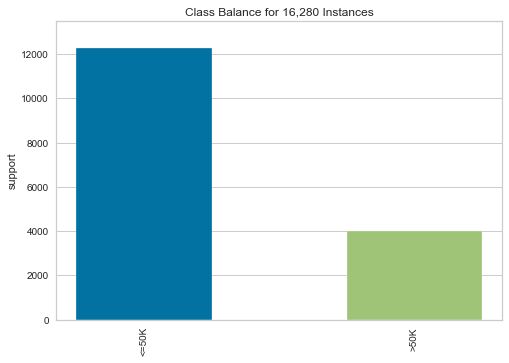

In [64]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

# over-sampling

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

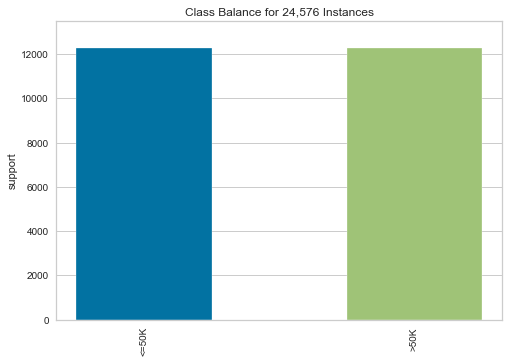

In [66]:
visualizer = ClassBalance()
visualizer.fit(y_res)
plt.xticks(rotation=90)
visualizer.poof()

# K-NN

In [67]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_res, test_size=0.25, 
                                                    shuffle=True, random_state=42)

In [94]:
len(X_train)

18432

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [42]:
from sklearn.model_selection import cross_val_score

In [59]:
cv_score = cross_val_score(knn, X_scaled, y, cv=5, scoring="accuracy")
pd.DataFrame(cv_score).rename(columns={0: '正解率'})

正解率
0  0.820387
1  0.829905
2  0.818796
3  0.823656
4  0.824578

In [60]:
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.8234642470397718


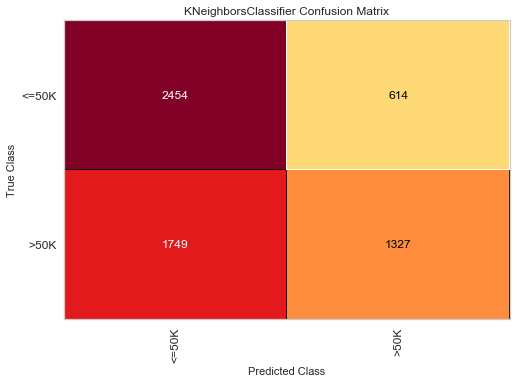

In [61]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(knn, classes=['<=50K','>50K'])

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.poof();

In [23]:
from sklearn import metrics
list_nn = []
list_score = []
n = [1,5,10,25,50,75,100,125,150,200, 250, 500, 750, 1000,1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000,12000,]
for k in n: 
  # KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # 予測　
  y_pred = knn.predict(X_val)

  # 評価 R^2
  score = knn.score(X_val, y_val)
  print("[%d] score: {:.2f}".format(score) % k)

  list_nn.append(k)
  list_score.append(score)

[1] score: 0.79
[5] score: 0.81
[10] score: 0.82
[25] score: 0.82
[50] score: 0.82
[75] score: 0.82
[100] score: 0.82
[125] score: 0.82
[150] score: 0.82
[200] score: 0.82
[250] score: 0.82
[500] score: 0.82
[750] score: 0.82
[1000] score: 0.81
[1500] score: 0.80
[2000] score: 0.78
[3000] score: 0.76
[4000] score: 0.76
[5000] score: 0.76
[6000] score: 0.76
[7000] score: 0.76
[8000] score: 0.76
[9000] score: 0.76
[10000] score: 0.76
[11000] score: 0.76
[12000] score: 0.76


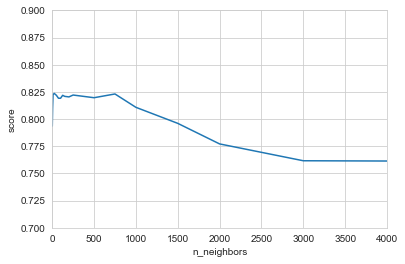

In [32]:
plt.ylim(0.7, 0.9)
plt.xlim(0, 4000)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

In [86]:
test_i = test_i.drop(['native-country'], 1)
test_scaled = scaler.fit_transform(test_i)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
test['Y']=knn.predict(test_scaled)

In [18]:
test[['id', 'Y']].to_csv('./submit2.csv', header=False, index=False)

# DecisionTree

In [71]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
tuning_parm = [
    {'max_depth': [3, 4, 5,6,7,8,9,10], 'min_samples_split': [ 4, 5, 6,7,8,9,10,11,12,13]}
]

tree_grid = GridSearchCV(DecisionTreeClassifier(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [95]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [146]:
result_df = pd.DataFrame.from_dict(tree_grid.cv_results_)
col = ['mean_test_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_test_score'], ascending=False)

mean_test_score                                      params
78         0.860786  {'max_depth': 10, 'min_samples_split': 12}
79         0.860731  {'max_depth': 10, 'min_samples_split': 13}
75         0.860731   {'max_depth': 10, 'min_samples_split': 9}
76         0.860460  {'max_depth': 10, 'min_samples_split': 10}
74         0.860352   {'max_depth': 10, 'min_samples_split': 8}
73         0.860352   {'max_depth': 10, 'min_samples_split': 7}
77         0.860297  {'max_depth': 10, 'min_samples_split': 11}
72         0.860189   {'max_depth': 10, 'min_samples_split': 6}
71         0.860135   {'max_depth': 10, 'min_samples_split': 5}
70         0.859646   {'max_depth': 10, 'min_samples_split': 4}
60         0.859592    {'max_depth': 9, 'min_samples_split': 4}
64         0.859538    {'max_depth': 9, 'min_samples_split': 8}
63         0.859538    {'max_depth': 9, 'min_samples_split': 7}
69         0.859484   {'max_depth': 9, 'min_samples_split': 13}
65         0.859429    {'max_depth': 9, 'min_samples_split': 9}
66         0.859321   {'max_depth': 9, 'min_samples_split': 10}
67         0.859266   {'max_depth': 9, 'min_samples_split': 11}
68         0.859158   {'max_depth': 9, 'min_samples_split': 12}
62         0.858995    {'max_depth': 9, 'min_samples_split': 6}
61         0.858832    {'max_depth': 9, 'min_samples_split': 5}
59         0.856066   {'max_depth': 8, 'min_samples_split': 13}
51         0.856011    {'max_depth': 8, 'min_samples_split': 5}
57         0.855957   {'max_depth': 8, 'min_samples_split': 11}
53         0.855957    {'max_depth': 8, 'min_samples_split': 7}
56         0.855903   {'max_depth': 8, 'min_samples_split': 10}
54         0.855903    {'max_depth': 8, 'min_samples_split': 8}
58         0.855794   {'max_depth': 8, 'min_samples_split': 12}
50         0.855794    {'max_depth': 8, 'min_samples_split': 4}
55         0.855740    {'max_depth': 8, 'min_samples_split': 9}
52         0.855632    {'max_depth': 8, 'min_samples_split': 6}
..              ...                                         ...
20         0.841200    {'max_depth': 5, 'min_samples_split': 4}
21         0.841200    {'max_depth': 5, 'min_samples_split': 5}
29         0.841200   {'max_depth': 5, 'min_samples_split': 13}
28         0.841146   {'max_depth': 5, 'min_samples_split': 12}
24         0.841146    {'max_depth': 5, 'min_samples_split': 8}
23         0.841146    {'max_depth': 5, 'min_samples_split': 7}
22         0.841146    {'max_depth': 5, 'min_samples_split': 6}
27         0.841092   {'max_depth': 5, 'min_samples_split': 11}
26         0.841092   {'max_depth': 5, 'min_samples_split': 10}
25         0.841092    {'max_depth': 5, 'min_samples_split': 9}
10         0.838704    {'max_depth': 4, 'min_samples_split': 4}
11         0.838704    {'max_depth': 4, 'min_samples_split': 5}
18         0.838704   {'max_depth': 4, 'min_samples_split': 12}
12         0.838704    {'max_depth': 4, 'min_samples_split': 6}
13         0.838704    {'max_depth': 4, 'min_samples_split': 7}
15         0.838704    {'max_depth': 4, 'min_samples_split': 9}
14         0.838650    {'max_depth': 4, 'min_samples_split': 8}
16         0.838650   {'max_depth': 4, 'min_samples_split': 10}
17         0.838650   {'max_depth': 4, 'min_samples_split': 11}
19         0.838650   {'max_depth': 4, 'min_samples_split': 13}
1          0.803331    {'max_depth': 3, 'min_samples_split': 5}
9          0.803331   {'max_depth': 3, 'min_samples_split': 13}
7          0.803331   {'max_depth': 3, 'min_samples_split': 11}
5          0.803331    {'max_depth': 3, 'min_samples_split': 9}
4          0.803331    {'max_depth': 3, 'min_samples_split': 8}
3          0.803331    {'max_depth': 3, 'min_samples_split': 7}
2          0.803331    {'max_depth': 3, 'min_samples_split': 6}
0          0.803331    {'max_depth': 3, 'min_samples_split': 4}
8          0.803277   {'max_depth': 3, 'min_samples_split': 12}
6          0.803277   {'max_depth': 3, 'min_samples_split': 10}

[80 rows x 2 columns]

In [97]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
tree = DecisionTreeClassifier(max_depth=7, min_samples_split=10)

In [115]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

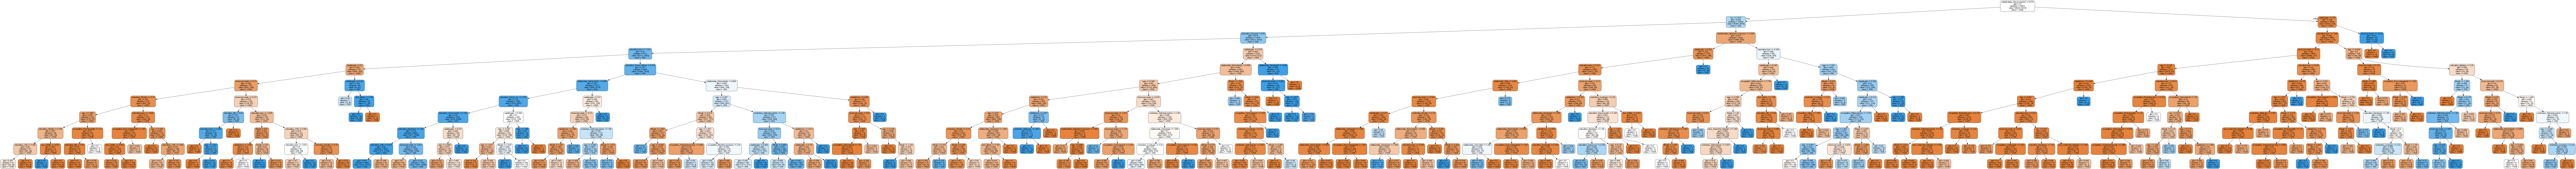

In [100]:
export_graphviz(tree, out_file="tree.dot", feature_names=X.columns, class_names=["<=50K",">50K"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="tree.dot")
g.write_png('figure-decisionTree.png')
Image(g.create_png())

In [126]:
cv_score_tree = cross_val_score(tree, X_scaled, y_res, cv=5, scoring="accuracy")
pd.DataFrame(cv_score_tree).rename(columns={0: '正解率'})

正解率
0  0.765663
1  0.811839
2  0.889138
3  0.898453
4  0.894994

In [127]:
print("cross_validation："+str(cv_score_tree.mean()))

cross_validation：0.852017367558458


In [128]:
print(tree.score(X_train, y_train))
print(tree.score(X_val, y_val))

0.8618706597222222
0.85205078125


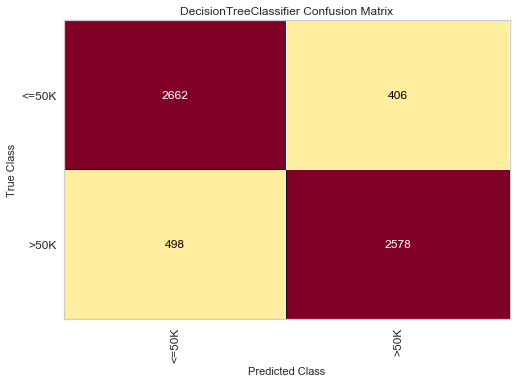

In [129]:
visualizer = ConfusionMatrix(tree, classes=['<=50K','>50K'])

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.poof();

In [105]:
tree.fit(X_scaled, y_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
test['Y'] = tree.predict(test_scaled)

In [113]:
test[['id', 'Y']].to_csv('./submit9.csv', header=False, index=False)